In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Adding Train and Test

In [12]:
train_data=pd.read_csv('Train (1).csv')   # Reading Train and test file
test_data=pd.read_csv('Test (1).csv')
train_data.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65
5,5,Skoda Fabia 1.6 MPI Elegance,Pune,2012,41629,Petrol,Manual,Second,14.83 kmpl,1598 CC,105 bhp,5.0,2.25
6,6,Honda Brio S MT,Mumbai,2013,17003,Petrol,Manual,First,19.4 kmpl,1198 CC,86.8 bhp,5.0,3.15
7,7,BMW X1 sDrive20d,Mumbai,2013,43000,Diesel,Automatic,First,17.05 kmpl,1995 CC,184 bhp,5.0,17.50
8,8,Honda City 1.5 V MT,Kolkata,2010,45008,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,3.00
9,9,Mercedes-Benz GLE 350d,Coimbatore,2018,29277,Diesel,Automatic,First,11.57 kmpl,2987 CC,254.79 bhp,5.0,59.65


In [13]:
train_data =train_data.drop(['Name', 'Unnamed: 0'], axis=1)    # Removing the Name Column considering it as irrelevant
test_data=test_data.drop(['Name','Unnamed: 0'],axis=1)

:I converted the Mileage column in both train_data and test_data from a string format containing units (' kmpl' or ' km/kg') to a numeric format (float) by removing the units using str.replace() and applying astype(float).
:Similarly, I cleaned the Engine column by removing the ' CC' suffix and converting it to a float.
:For the Power column, I removed the ' bhp' suffix, replaced 'null' values with np.nan, and converted the column to a numeric format.
For Mileage, Engine, Power, and Seats columns in both train_data and test_data, I filled missing values (NaN) with their respective median values to ensure continuity and reduce the impact of outliers

In [14]:
train_data['Mileage'] =train_data['Mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
train_data['Engine'] =train_data['Engine'].astype(str).str.replace(" CC", "").astype(float)
train_data['Power'] =train_data['Power'].astype(str).str.replace(" bhp", "").replace('null', np.nan).astype(float)
train_data['Mileage'] =train_data['Mileage'].fillna(train_data['Mileage'].median())
train_data['Engine'] =train_data['Engine'].fillna(train_data['Engine'].median())
train_data['Power'] =train_data['Power'].fillna(train_data['Power'].median())
train_data['Seats'] =train_data['Seats'].fillna(train_data['Seats'].median())
test_data['Mileage'] =test_data['Mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
test_data['Engine'] =test_data['Engine'].astype(str).str.replace(" CC", "").astype(float)
test_data['Power'] =test_data['Power'].astype(str).str.replace(" bhp", "").replace('null', np.nan).astype(float)
test_data['Mileage'] =test_data['Mileage'].fillna(test_data['Mileage'].median())
test_data['Engine'] =test_data['Engine'].fillna(test_data['Engine'].median())
test_data['Power'] =test_data['Power'].fillna(test_data['Power'].median())
test_data['Seats'] =test_data['Seats'].fillna(test_data['Seats'].median())



The variables which only have inputs can be one hot encoded where new columns are created containing True and False

In [15]:
train_data_new = pd.get_dummies(train_data[['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']], drop_first=True)
train_ft = pd.concat([train_data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']],train_data_new], axis=1)
train_price =train_data['Price']
test_data_new = pd.get_dummies(test_data[['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']], drop_first=True)
test_ft = pd.concat([test_data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']],test_data_new], axis=1)
test_price =test_data['Price']

# Performing One Hot Encoding

In [16]:
train_ft

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2017,16500,23.84,1199.0,84.00,5.0,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False
1,2017,47357,18.49,1493.0,100.00,7.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2014,35000,15.00,1598.0,103.52,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
3,2007,200000,17.20,1396.0,53.50,5.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,2013,64000,21.02,1248.0,88.76,5.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2009,150000,11.00,2993.0,235.00,5.0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3746,2012,85000,11.79,2179.0,120.00,7.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3747,2007,55100,18.90,998.0,67.10,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3748,2014,77500,20.45,1461.0,83.80,5.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [17]:
test_ft

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2013,84175,23.40,1248.0,74.00,5.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,2012,62282,16.95,1197.0,78.90,5.0,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2017,37460,18.60,1197.0,81.86,5.0,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False
3,2011,106976,13.50,2400.0,215.00,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2013,60000,20.36,1197.0,78.90,5.0,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2013,71000,22.70,1582.0,126.20,5.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1246,2005,91000,16.80,1341.0,83.00,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
1247,2017,50534,17.21,1197.0,103.50,5.0,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1248,2012,83000,19.08,1582.0,126.32,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [18]:
train_ft = (train_ft - train_ft.mean()) / train_ft.std()
test_ft = (test_ft - test_ft.mean()) / test_ft.std()
x1 = train_ft.values
y1 = train_price.values.reshape(-1, 1)
x2 = test_ft.values
y2 = test_price.values.reshape(-1, 1)

In [19]:
x1 = np.hstack([np.ones((x1.shape[0], 1)), x1])
x2 = np.hstack([np.ones((x2.shape[0], 1)), x2])

In [20]:
def predict(x, w):
    pred=np.dot(x,w)
    return pred

In [21]:
w1 = np.random.randn(x1.shape[1], 1)
w2 = np.random.randn(x2.shape[1], 1)
iterations = 10000
alpha = 0.001 # learning rate
def compute_cost(x1, y1, w1):
    m = len(y1)
    predict = x1.dot(w1)
    cost = (1 / (2 * m)) * np.sum(np.square(predict - y1))
    return cost
def gradient_descent(x1, y1, w1, alpha, iterations):
    m = len(y1)
    cost1 = []
    for i in range(iterations):
        gradients1 = (1 / m) * x1.T.dot(x1.dot(w1) - y1)
        w1 -= alpha * gradients1
        cost1.append(compute_cost(x1, y1, w1))
    return w1, cost1

In [22]:
w_new1, cost1 = gradient_descent(x1, y1, w1, alpha, iterations)
w_new2, cost2 = gradient_descent(x2, y2, w2, alpha, iterations)
w_new1, cost1[-1]

(array([[ 9.49817260e+00],
        [ 2.96582026e+00],
        [-1.07379146e+00],
        [-8.73293237e-01],
        [ 2.01061718e+00],
        [ 5.05913221e+00],
        [-1.09269370e+00],
        [ 1.41356667e-01],
        [-1.24623403e+00],
        [-1.34126325e+00],
        [ 6.70944632e-03],
        [-1.63260386e-01],
        [ 4.50865827e-02],
        [ 1.41344483e-01],
        [-3.92255674e-03],
        [ 3.12363079e-01],
        [-5.53453899e-01],
        [ 3.69162281e-01],
        [-3.05968344e-02],
        [-2.72425572e-01],
        [-7.11339587e-01],
        [-7.11061281e-01],
        [-1.92398299e-01]]),
 19.042395981795757)

In [23]:
w_new2, cost2[-1]

(array([[ 9.77175359],
        [ 3.64341997],
        [ 0.62453705],
        [-0.92810322],
        [ 1.6398234 ],
        [ 5.1367242 ],
        [-1.26048875],
        [ 0.18094767],
        [-1.16094956],
        [-1.51066991],
        [ 0.04612664],
        [-0.36543919],
        [ 0.34983889],
        [ 0.59717358],
        [ 0.40988784],
        [ 0.6407024 ],
        [ 0.05832674],
        [ 0.49139254],
        [ 0.2498653 ],
        [-0.18531103],
        [-0.14181666],
        [-0.06320838],
        [ 0.15313086]]),
 18.466882921019245)

In [24]:
pred_cost1=predict(x1,w1)
pred_cost2=predict(x2,w2)
pred_cost1 = pred_cost1.reshape(-1)
pred_cost2 = pred_cost2.reshape(-1)
pred_cost1,pred_cost2


(array([ 8.57946867, 12.03073347,  7.02647617, ..., -3.96565997,
         8.24213563, -1.52125702]),
 array([ 4.4587694 ,  4.57320493,  6.00532559, ..., 14.60649569,
        12.78028634, 11.0021479 ]))

The R2 provides a way to evaluate how well the predictions (cost) match the actual data (price) in a regression model.

In [25]:
def rsquared(price, cost):
    rss = np.sum((price - cost) ** 2)
    tss = np.sum((price - np.mean(cost)) ** 2)
    return 1 - rss / tss

In [26]:
R21=rsquared(train_price, pred_cost1)
R22=rsquared(test_price, pred_cost2)
print(f"Training R2 Score: {R21}")
print(f"Testing R2 Score: {R22}")

Training R2 Score: 0.6967338828095665
Testing R2 Score: 0.7020958392900243


In [27]:
print("Final cost of testing set:", cost2[-1])
print("Final weights:", w_new2)

Final cost of testing set: 18.466882921019245
Final weights: [[ 9.77175359]
 [ 3.64341997]
 [ 0.62453705]
 [-0.92810322]
 [ 1.6398234 ]
 [ 5.1367242 ]
 [-1.26048875]
 [ 0.18094767]
 [-1.16094956]
 [-1.51066991]
 [ 0.04612664]
 [-0.36543919]
 [ 0.34983889]
 [ 0.59717358]
 [ 0.40988784]
 [ 0.6407024 ]
 [ 0.05832674]
 [ 0.49139254]
 [ 0.2498653 ]
 [-0.18531103]
 [-0.14181666]
 [-0.06320838]
 [ 0.15313086]]


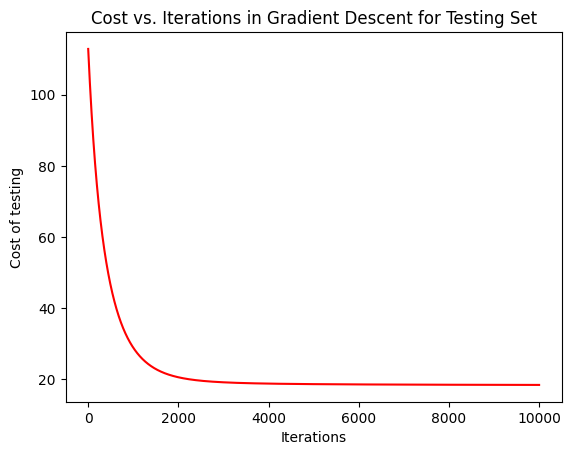

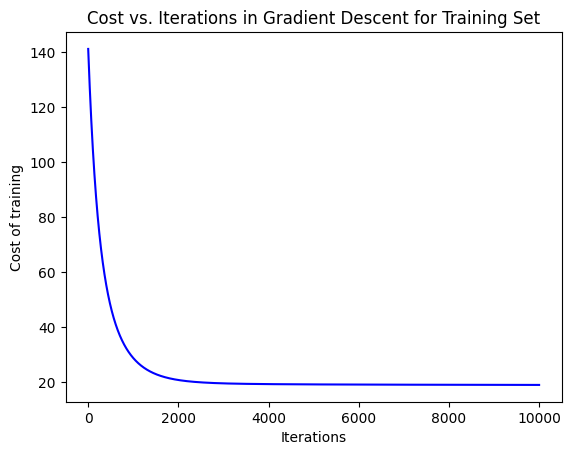

In [28]:
plt.plot(range(iterations), cost2, color="red")
plt.xlabel("Iterations")
plt.ylabel("Cost of testing")
plt.title("Cost vs. Iterations in Gradient Descent for Testing Set")
plt.show()
plt.plot(range(iterations), cost1, color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost of training")
plt.title("Cost vs. Iterations in Gradient Descent for Training Set")
plt.show()

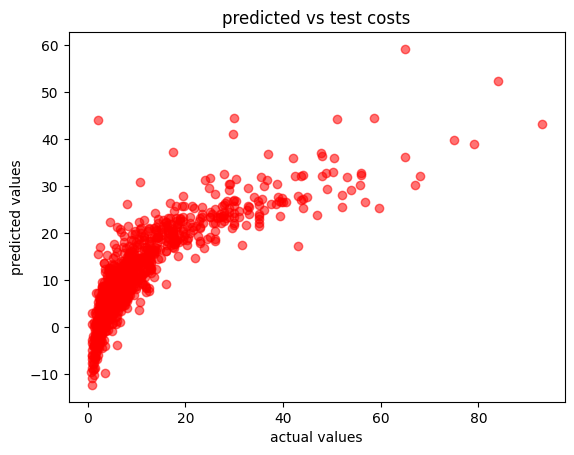

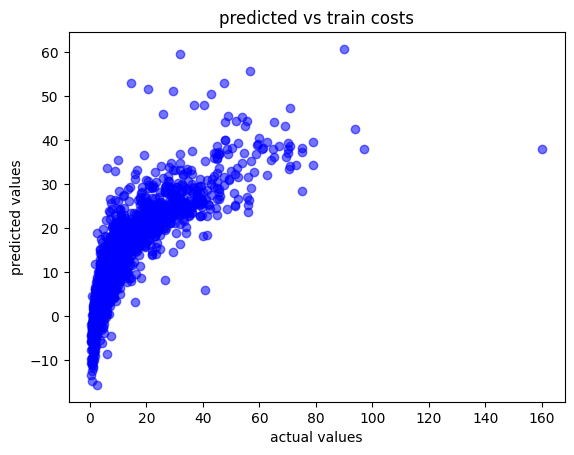

In [29]:
plt.scatter(test_price,pred_cost2,color='red',alpha=0.55)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('predicted vs test costs')
plt.show()
plt.scatter(train_price,pred_cost1,color='blue',alpha=0.55)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('predicted vs train costs')
plt.show()